In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from functools import reduce
import scipy
from copy import deepcopy
from scipy.linalg import logm
import numpy as np
import dill


In [3]:
import dill 
filename = 'pickled_controls5.pkl'
pca = dill.load(open(filename, 'rb'))
num_keep = len(pca.controlset)
#num_keep = 400
pca.controlset = pca.controlset[:num_keep]

In [4]:
def hist_and_support(weights, num=10):
    plt.hist(weights)
    np.argmax(weights)
    top_idx = np.argsort(np.array(weights).T)[0][-num:]
    top_values = [weights[i] for i in top_idx]
    print(f"SUPPORT:{np.sum(top_values)}")
    print(f"NUM CONTROLS: {num}")
    return top_idx, np.sum(top_values)

In [5]:
num_weights = 10
scale = 100
num_points = 11
num_processors = 4

In [6]:
from convex import all_derivs, optimal_weights
from pauli_channel_approximation import PCA
# If the tolerance is too high (i.e. not zero) and the number of controls is too high (e.g. >100) this was failing with ECOS.
pca.derivs = all_derivs(pca.controlset, pca.target_operator, pca.control_hamiltonians, pca.ambient_hamiltonian, pca.dt, 1)

Control 0 derivative.
Control 1 derivative.
Control 2 derivative.
Control 3 derivative.
Control 4 derivative.
Control 5 derivative.
Control 6 derivative.
Control 7 derivative.
Control 8 derivative.
Control 9 derivative.
Control 10 derivative.
Control 11 derivative.
Control 12 derivative.
Control 13 derivative.
Control 14 derivative.
Control 15 derivative.
Control 16 derivative.
Control 17 derivative.
Control 18 derivative.
Control 19 derivative.
Control 20 derivative.
Control 21 derivative.
Control 22 derivative.
Control 23 derivative.
Control 24 derivative.
Control 25 derivative.
Control 26 derivative.
Control 27 derivative.
Control 28 derivative.
Control 29 derivative.
Control 30 derivative.
Control 31 derivative.
Control 32 derivative.
Control 33 derivative.
Control 34 derivative.
Control 35 derivative.
Control 36 derivative.
Control 37 derivative.
Control 38 derivative.
Control 39 derivative.
Control 40 derivative.
Control 41 derivative.
Control 42 derivative.
Control 43 derivative

Control 356 derivative.
Control 357 derivative.
Control 358 derivative.
Control 359 derivative.
Control 360 derivative.
Control 361 derivative.
Control 362 derivative.
Control 363 derivative.
Control 364 derivative.
Control 365 derivative.
Control 366 derivative.
Control 367 derivative.
Control 368 derivative.
Control 369 derivative.
Control 370 derivative.
Control 371 derivative.
Control 372 derivative.
Control 373 derivative.
Control 374 derivative.
Control 375 derivative.
Control 376 derivative.
Control 377 derivative.
Control 378 derivative.
Control 379 derivative.
Control 380 derivative.
Control 381 derivative.
Control 382 derivative.
Control 383 derivative.
Control 384 derivative.
Control 385 derivative.
Control 386 derivative.
Control 387 derivative.
Control 388 derivative.
Control 389 derivative.
Control 390 derivative.
Control 391 derivative.
Control 392 derivative.
Control 393 derivative.
Control 394 derivative.
Control 395 derivative.
Control 396 derivative.
Control 397 deri

Control 708 derivative.
Control 709 derivative.
Control 710 derivative.
Control 711 derivative.
Control 712 derivative.
Control 713 derivative.
Control 714 derivative.
Control 715 derivative.
Control 716 derivative.
Control 717 derivative.
Control 718 derivative.
Control 719 derivative.
Control 720 derivative.
Control 721 derivative.
Control 722 derivative.
Control 723 derivative.
Control 724 derivative.
Control 725 derivative.
Control 726 derivative.
Control 727 derivative.
Control 728 derivative.
Control 729 derivative.
Control 730 derivative.
Control 731 derivative.
Control 732 derivative.
Control 733 derivative.
Control 734 derivative.
Control 735 derivative.
Control 736 derivative.
Control 737 derivative.
Control 738 derivative.
Control 739 derivative.
Control 740 derivative.
Control 741 derivative.
Control 742 derivative.
Control 743 derivative.
Control 744 derivative.
Control 745 derivative.
Control 746 derivative.
Control 747 derivative.
Control 748 derivative.
Control 749 deri

Control 305 derivative.
Control 306 derivative.
Control 307 derivative.
Control 308 derivative.
Control 309 derivative.
Control 310 derivative.
Control 311 derivative.
Control 312 derivative.
Control 313 derivative.
Control 314 derivative.
Control 315 derivative.
Control 316 derivative.
Control 317 derivative.
Control 318 derivative.
Control 319 derivative.
Control 320 derivative.
Control 321 derivative.
Control 322 derivative.
Control 323 derivative.
Control 324 derivative.
Control 325 derivative.
Control 326 derivative.
Control 327 derivative.
Control 328 derivative.
Control 329 derivative.
Control 330 derivative.
Control 331 derivative.
Control 332 derivative.
Control 333 derivative.
Control 334 derivative.
Control 335 derivative.
Control 336 derivative.
Control 337 derivative.
Control 338 derivative.
Control 339 derivative.
Control 340 derivative.
Control 341 derivative.
Control 342 derivative.
Control 343 derivative.
Control 344 derivative.
Control 345 derivative.
Control 346 deri

Control 647 derivative.
Control 648 derivative.
Control 649 derivative.
Control 650 derivative.
Control 651 derivative.
Control 652 derivative.
Control 653 derivative.
Control 654 derivative.
Control 655 derivative.
Control 656 derivative.
Control 657 derivative.
Control 658 derivative.
Control 659 derivative.
Control 660 derivative.
Control 661 derivative.
Control 662 derivative.
Control 663 derivative.
Control 664 derivative.
Control 665 derivative.
Control 666 derivative.
Control 667 derivative.
Control 668 derivative.
Control 669 derivative.
Control 670 derivative.
Control 671 derivative.
Control 672 derivative.
Control 673 derivative.
Control 674 derivative.
Control 675 derivative.
Control 676 derivative.
Control 677 derivative.
Control 678 derivative.
Control 679 derivative.
Control 680 derivative.
Control 681 derivative.
Control 682 derivative.
Control 683 derivative.
Control 684 derivative.
Control 685 derivative.
Control 686 derivative.
Control 687 derivative.
Control 688 deri

# Making the regularizer too small can prevent it from working - i.e. the solver will fail. Anything above around 1E-3 or 1E-4 seems to work well. These cells assign the 0RBC weights, and 1RBC weights, with sparsity constraints. (This could be because the constraint makes the optimization work over numbers small in magnitude, so that numerical inaccuracy takes over.)

# Support for 0th order controls

In [7]:
l2 = 125

In [8]:
pca.weights_0 = optimal_weights(pca.derivs[:1], sparsity=True, sparsity_param=1E-2, l2_constraint=True, l2_param=l2)

Done with convex problem 0 out of 750
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type     

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

17  2.5e-10  6.9e-10  7.9e-06  1.00e+00   6.070026477e-01   6.070026606e-01   2.5e-10  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.0700264768e-01    nrm: 5e+00    Viol.  con: 7e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.0700266062e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 2e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

17  1.2e-08  3.3e-08  2.4e-08  1.00e+00   7.118693852e-01   7.118693334e-01   1.2e-08  0.09  
Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.1186938517e-01    nrm: 4e+00    Viol.  con: 3e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.1186933344e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 9e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 3.9430382017e-01    nrm: 8e+00    Viol.  con: 3e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 3.9430402197e-01    nrm: 1e+02    Viol.  con: 2e-16    var: 8e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

  Solution status : OPTIMAL
  Primal.  obj: 6.8508561871e-01    nrm: 4e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.8508563828e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 5e-09    cones: 0e+00  
Done with convex problem 10 out of 750
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time       

Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.5986010109e-01    nrm: 4e+00    Viol.  con: 2e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.5986010154e-01    nrm: 9e+01    Viol.  con: 9e-16    var: 5e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

  Dual.    obj: 4.9204144423e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 2e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 4.6061088150e-01    nrm: 8e+00    Viol.  con: 6e-11    var: 0e+00    cones: 0e+00  
  Dual.    obj: 4.6061088233e-01    nrm: 1e+02    Viol.  con: 4e-16    var: 2e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time 

  Solution status : OPTIMAL
  Primal.  obj: 6.0335665427e-01    nrm: 5e+00    Viol.  con: 1e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.0335665571e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 3e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep

Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.5086710461e-01    nrm: 5e+00    Viol.  con: 8e-11    var: 0e+00    cones: 0e+00  
  Dual.    obj: 5.5086710536e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 2e-10    cones: 0e+00  
Done with convex problem 20 out of 750
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1          

Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 4.6475454898e-01    nrm: 6e+00    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 4.6475466038e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 5e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

18  7.1e-10  2.0e-09  1.9e-05  1.00e+00   6.697460067e-01   6.697460221e-01   7.1e-10  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.6974600666e-01    nrm: 4e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.6974602206e-01    nrm: 1e+02    Viol.  con: 2e-15    var: 5e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

  Solution status : OPTIMAL
  Primal.  obj: 6.6326879399e-01    nrm: 5e+00    Viol.  con: 3e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.6326914558e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 9e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep

  Dual.    obj: 4.1510353066e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 2e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

Done with convex problem 30 out of 750
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type    

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3           

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization prob

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix vari

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer var

Optimizer terminated. Time: 0.11    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 3.5176308196e-01    nrm: 9e+00    Viol.  con: 3e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 3.5176317966e-01    nrm: 1e+02    Viol.  con: 2e-16    var: 8e-08    cones: 0e+00  
Done with convex problem 40 out of 750
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1          

15  1.8e-06  5.1e-06  8.1e-04  1.00e+00   5.408463791e-01   5.409075622e-01   1.8e-06  0.07  
16  2.3e-07  6.5e-07  7.0e-04  1.00e+00   5.412373939e-01   5.412366300e-01   2.3e-07  0.07  
17  2.9e-09  8.1e-09  7.8e-05  1.00e+00   5.412671536e-01   5.412671441e-01   2.9e-09  0.08  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.4126715363e-01    nrm: 5e+00    Viol.  con: 8e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 5.4126714405e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0            

Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.3951326966e-01    nrm: 4e+00    Viol.  con: 1e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.3951328592e-01    nrm: 1e+02    Viol.  con: 9e-16    var: 3e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

  Solution status : OPTIMAL
  Primal.  obj: 7.0673737542e-01    nrm: 4e+00    Viol.  con: 8e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.0673737470e-01    nrm: 1e+02    Viol.  con: 4e-15    var: 2e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep

  Dual.    obj: 3.6474368165e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 6e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

Done with convex problem 50 out of 750
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type    

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization prob

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3           

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer var

  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526        

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
O

Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - 

Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11 

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variab

Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic   

Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - 

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Fa

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - 

  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  -

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix vari

  Dual.    obj: 5.3840952685e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 7e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3           

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer var

  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  -

  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the pri

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3           

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer var

  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  -

Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variab

Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones             

  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the pri

Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-defi

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68      

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Fa

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68      

Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Fa

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 

Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Fa

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        



Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9

  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       T

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+0

  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68       

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - 

Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones             


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints           

Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic   

Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - 

Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Fa

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic   

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variab

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer var

Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - 

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic   

Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.01            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.02    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variab

Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0      

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-defi

Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0      

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.02    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - 

Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic   

  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the pri

Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.02    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-defi

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       T

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        



Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -

Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9.84e-01  -1.921419207e+01  -7.618815052e+00  1.9e-01  0.03  
2   1.4e-02  3.8e-02  1.1e-02  -5.44e-01  -4.353361638e+01  -2.129999987e+01  1.4e-02  0.03  
3   3.5e-03  9.7e-03  1.1e-02  1.69e

Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9.86e-01  -1.932857995e+01  -7.663506355e+00  1.9e-01  0.07  
2   1.4e-02  3.8e-02  1.1e-02  -5.58e-01  -4.480677442e+01  -2.170602415e+01  1.4e-02  0.07  
3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.491550251e+01  -1.353173517e+01  3.5e-03  0.07  
4   2.5e-03  6.9e-03  1.4e-02  4.35e+00   -3.999257649e+00  -3.548578358e+00  2.5e-03  0.07  
5   1.6e-03  4.4e-03  1.5e-02  2.90e+00   -8.091819658e-01  -6.495965554e-01  1.6e-03  0.07  
6   8.8e-04  2.5e-03  1.3e-02  2.11e+00   3.4188

Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9.87e-01  -1.935568389e+01  -7.674963766e+00  1.9e-01  0.04  
2   1.4e-02  3.9e-02  1.1e-02  -5.62e-01  -4.506048717e+01  -2.178223829e+01  1.4e-02  0.04  
3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.497067181e+01  -1.358781285e+01  3.5e-03  0.04  
4   2.5e-03  7.0e-03  1.4e-02  4.36e+00   -4.008197348e+00  -3.558171094e+00  2.5e-03  0.04  
5   1.6e-03  4.5e-03  1.5e-02  2.90e+00   -8

Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9.83e-01  -1.915557287e+01  -7.597101034e+00  1.9e-01  0.06  
2   1.4e-02  3.8e-02  1.1e-02  -5.37e-01  -4.288324787e+01  -2.108993342e+01  1.4e-02  0.06  
3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.447263994e+01  -1.312680910e+01  3.5e-03  0.06  
4   2.5e-03  7.0e-03  1.4e-02  4.25e+00   -3.980330781e+00  -3.534627443e+00  2.5e-03  0.07  
5   1.5e-03  4.2e-03  1.5e-02  2.93e+00   -4.700673997e-01  -3.339416853e-01  1.5e-03  0.07  
6   8.7e-04  2.4e-03  1.3e-02  2.06e+00   4.8701

Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9.85e-01  -1.925570011e+01  -7.635729416e+00  1.9e-01  0.04  
2   1.4e-02  3.8e-02  1.1e-02  -5.49e-01  -4.391427557e+01  -2.141738017e+01  1.4e-02  0.05  
3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.470599271e+01  -1.334379604e+01  3.5e-03  0.05  
4   2.5e-03  7.0e-03  1.4e-02  4.31e+00   -3.972762439e+00  -3.526960275e+00  2.5e-03  0.05  
5   1.6e-03  4.4e-03  1.5e-02  2.91e+00   -7.233801124e-01  -5.685634288e-01  1.6e-03  0.05  
6   9.0e-04  2.5e-03  1.3e-02  2.12e+00   3.931083038e-01   4.560372121e-01   9.0e-04  0.05  
7   7.2e-04  2.0e-03  1.1e-02  1.32e+00   1.11373021

0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   1.9e-01  5.4e-01  1.8e-01  -9.86e-01  -1.930437438e+01  -7.653850595e+00  1.9e-01  0.04  
2   1.4e-02  3.8e-02  1.1e-02  -5.55e-01  -4.454842405e+01  -2.162750902e+01  1.4e-02  0.04  
3   3.4e-03  9.6e-03  1.1e-02  1.69e+00   -1.485825260e+01  -1.347599889e+01  3.4e-03  0.04  
4   2.5e-03  6.9e-03  1.4e-02  4.34e+00   -3.993654782e+00  -3.542843361e+00  2.5e-03  0.04  
5   1.6e-03  4.4e-03  1.5e-02  2.90e+00   -7.807884394e-01  -6.215575312e-01  1.6e-03  0.05  
6   8.8e-04  2.5e-03  1.3e-02  2.10e+00   3.621108009e-01   4.254615097e-01   8.8e-04  0.05  
7   6.6e-04  1.9e-03  1.0e-02  1.30e+00   6.276223312e-02   1.243296344e-01   6.6e-04  0.05  
8   9.6e-05  2.7e-04  3.7e-03  1.30e+00   5.038958546e-01   5.133863533e-01   9.6e-05  0.05  
9   4.8e-05  1.3e-04  2.8e-03  9.88e-01   5.935571899e-01   5.977882035e-01   4.8e-05  0.05  
10  4.0e-05  1.1e-04  2.6e-03  9.97e-01   5.957828822e-01   

1   1.9e-01  5.4e-01  1.8e-01  -9.84e-01  -1.920296553e+01  -7.615073247e+00  1.9e-01  0.04  
2   1.4e-02  3.8e-02  1.1e-02  -5.42e-01  -4.334826158e+01  -2.123560879e+01  1.4e-02  0.05  
3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.457611094e+01  -1.322386611e+01  3.5e-03  0.05  
4   2.5e-03  7.0e-03  1.4e-02  4.28e+00   -3.966574244e+00  -3.521815596e+00  2.5e-03  0.05  
5   1.6e-03  4.4e-03  1.5e-02  2.92e+00   -6.127673594e-01  -4.651873953e-01  1.6e-03  0.05  
6   8.7e-04  2.4e-03  1.3e-02  2.09e+00   4.556404102e-01   5.162942708e-01   8.7e-04  0.05  
7   7.0e-04  2.0e-03  1.1e-02  1.30e+00   2.227262391e-01   2.817900069e-01   7.0e-04  0.05  
8   1.1e-04  3.2e-04  4.3e-03  1.30e+00   6.146700670e-01   6.247466673e-01   1.1e-04  0.06  
9   8.7e-05  2.4e-04  3.9e-03  1.04e+00   6.466433971e-01   6.536725782e-01   8.7e-05  0.06  
10  7.5e-05  2.1e-04  3.7e-03  1.02e+00   6.430034458e-01   6.487904100e-01   7.5e-05  0.06  
11  4.9e-05  1.4e-04  3.2e-03  1.03e+00   6.575433242e-01   

0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9.86e-01  -1.930956635e+01  -7.655950019e+00  1.9e-01  0.04  
2   1.4e-02  3.8e-02  1.1e-02  -5.56e-01  -4.459261358e+01  -2.163848573e+01  1.4e-02  0.04  
3   3.5e-03  9.6e-03  1.1e-02  1.69e+00   -1.486632568e+01  -1.348582753e+01  3.5e-03  0.05  
4   2.5e-03  6.9e-03  1.4e-02  4.34e+00   -3.992254076e+00  -3.542194277e+00  2.5e-03  0.05  
5   1.6e-03  4.4e-03  1.5e-02  2.90e+00   -7.912096569e-01  -6.318905142e-01  1.6e-03  0.05  
6   8.8e-04  2.5e-03  1.3e-02  2.11e+00   3.572311757e-01   4.202486598e-01   8.8e-04  0.05  
7   6.5e-04  1.8e-03  1.0e-02  1.31e+00   4.856548654e-02   1.093939393e-01   6.5e-04  0.05  
8   9.0e-05  2.5e-04  3.6e-03  1.31e+00   5.083107772e-01   5.170562679e-01   9.0e-05  0.06  
9   4.4e-05  1.2e-04  2.7e-03  1.00e+00   6.074820301e-01   6.111888494e-01   4.4e-05  0.06  
10  3.9e-05  1.1e-04  2.6e-03  9.97e-01   6.106715014e-01   

2   1.4e-02  3.8e-02  1.1e-02  -5.37e-01  -4.289795012e+01  -2.109070095e+01  1.4e-02  0.04  
3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.447439696e+01  -1.312896018e+01  3.5e-03  0.04  
4   2.5e-03  7.0e-03  1.4e-02  4.25e+00   -3.973802299e+00  -3.528506222e+00  2.5e-03  0.04  
5   1.5e-03  4.2e-03  1.5e-02  2.92e+00   -4.662511711e-01  -3.297551970e-01  1.5e-03  0.04  
6   8.6e-04  2.4e-03  1.3e-02  2.04e+00   4.870807533e-01   5.473192417e-01   8.6e-04  0.05  
7   7.2e-04  2.0e-03  1.1e-02  1.29e+00   2.636026361e-01   3.240923466e-01   7.2e-04  0.05  
8   1.2e-04  3.3e-04  4.4e-03  1.29e+00   6.228054700e-01   6.333510902e-01   1.2e-04  0.05  
9   7.0e-05  2.0e-04  3.5e-03  1.02e+00   6.819872492e-01   6.875209288e-01   7.0e-05  0.06  
10  5.8e-05  1.6e-04  3.3e-03  1.01e+00   6.794631174e-01   6.837737474e-01   5.8e-05  0.06  
11  3.3e-05  9.4e-05  2.7e-03  1.01e+00   6.972693122e-01   6.993732845e-01   3.3e-05  0.06  
12  2.1e-05  5.9e-05  2.3e-03  1.02e+00   7.022640526e-01   

3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.510837687e+01  -1.371016924e+01  3.5e-03  0.03  
4   2.5e-03  7.0e-03  1.4e-02  4.39e+00   -4.042594760e+00  -3.587841330e+00  2.5e-03  0.03  
5   1.6e-03  4.4e-03  1.5e-02  2.90e+00   -8.600355273e-01  -7.015162086e-01  1.6e-03  0.03  
6   8.9e-04  2.5e-03  1.3e-02  2.11e+00   2.610669227e-01   3.242812666e-01   8.9e-04  0.03  
7   7.1e-04  2.0e-03  1.1e-02  1.32e+00   -9.016765150e-03  5.356657550e-02   7.1e-04  0.03  
8   1.2e-04  3.4e-04  4.4e-03  1.32e+00   3.649106958e-01   3.758523684e-01   1.2e-04  0.03  
9   4.7e-05  1.3e-04  2.8e-03  1.05e+00   4.246059893e-01   4.285311165e-01   4.7e-05  0.04  
10  3.3e-05  9.1e-05  2.5e-03  1.03e+00   4.268651082e-01   4.292758830e-01   3.3e-05  0.04  
11  1.9e-05  5.4e-05  2.0e-03  1.02e+00   4.379365448e-01   4.392126408e-01   1.9e-05  0.04  
12  1.7e-05  4.8e-05  1.9e-03  1.01e+00   4.372064449e-01   4.382934643e-01   1.7e-05  0.05  
13  3.0e-06  8.4e-06  1.2e-03  1.01e+00   4.428378944e-01   

5   1.6e-03  4.4e-03  1.5e-02  2.91e+00   -6.547521316e-01  -5.043542865e-01  1.6e-03  0.05  
6   8.7e-04  2.4e-03  1.3e-02  2.10e+00   4.536107238e-01   5.136287938e-01   8.7e-04  0.05  
7   6.7e-04  1.9e-03  1.1e-02  1.30e+00   2.304703480e-01   2.870870921e-01   6.7e-04  0.05  
8   1.1e-04  3.1e-04  4.3e-03  1.30e+00   6.401161207e-01   6.497023457e-01   1.1e-04  0.05  
9   5.3e-05  1.5e-04  3.5e-03  1.04e+00   6.466531500e-01   6.498962599e-01   5.3e-05  0.05  
10  1.5e-05  4.1e-05  2.3e-03  1.02e+00   6.695705844e-01   6.700792974e-01   1.5e-05  0.05  
11  2.6e-06  7.4e-06  9.7e-04  1.00e+00   6.772647938e-01   6.773564230e-01   2.6e-06  0.05  
12  3.8e-07  1.1e-06  3.7e-04  9.99e-01   6.786878811e-01   6.787004068e-01   3.8e-07  0.06  
13  1.6e-08  4.4e-08  7.7e-05  1.00e+00   6.788832664e-01   6.788837752e-01   1.6e-08  0.06  
14  2.4e-11  6.8e-11  3.0e-06  1.00e+00   6.788927194e-01   6.788927202e-01   2.4e-11  0.06  
Optimizer terminated. Time: 0.07    


Interior-point soluti

8   1.0e-04  2.8e-04  3.9e-03  1.31e+00   4.087491751e-01   4.180861364e-01   1.0e-04  0.07  
9   5.2e-05  1.5e-04  2.9e-03  1.02e+00   4.914865323e-01   4.960471748e-01   5.2e-05  0.07  
10  3.8e-05  1.1e-04  2.6e-03  9.95e-01   5.039446199e-01   5.069866410e-01   3.8e-05  0.07  
11  3.5e-05  9.9e-05  2.5e-03  1.00e+00   4.993037851e-01   5.020208045e-01   3.5e-05  0.07  
12  2.1e-05  6.0e-05  2.2e-03  9.99e-01   5.059886309e-01   5.073142020e-01   2.1e-05  0.08  
13  3.0e-06  8.5e-06  8.7e-04  1.00e+00   5.195725199e-01   5.197351717e-01   3.0e-06  0.09  
14  2.1e-07  6.0e-07  2.3e-04  1.00e+00   5.211044474e-01   5.211155708e-01   2.1e-07  0.09  
15  1.4e-09  3.9e-09  1.9e-05  1.00e+00   5.212038777e-01   5.212039483e-01   1.4e-09  0.09  
Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.2120387772e-01    nrm: 6e+00    Viol.  con: 4e-09    var: 0e+00    cones: 0e+00  
  Du

10  5.7e-05  1.6e-04  3.1e-03  9.94e-01   4.961276083e-01   5.007792587e-01   5.7e-05  0.07  
11  3.5e-05  9.9e-05  2.6e-03  9.95e-01   5.159975200e-01   5.185465803e-01   3.5e-05  0.07  
12  2.6e-05  7.3e-05  2.4e-03  1.01e+00   5.158732309e-01   5.175156599e-01   2.6e-05  0.07  
13  5.8e-06  1.6e-05  1.2e-03  9.91e-01   5.306687258e-01   5.310005809e-01   5.8e-06  0.07  
14  1.7e-06  4.7e-06  6.4e-04  1.00e+00   5.319994988e-01   5.320899358e-01   1.7e-06  0.07  
15  5.4e-07  1.5e-06  4.8e-04  9.99e-01   5.323321906e-01   5.323466758e-01   5.4e-07  0.07  
16  7.0e-08  2.0e-07  1.8e-04  1.00e+00   5.325057630e-01   5.325075119e-01   7.0e-08  0.08  
17  6.9e-10  1.9e-09  2.8e-05  1.00e+00   5.325219895e-01   5.325219922e-01   6.9e-10  0.08  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.3252198949e-01    nrm: 6e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Du

11  1.3e-05  3.8e-05  1.8e-03  1.03e+00   5.027394954e-01   5.034880559e-01   1.3e-05  0.06  
12  5.1e-06  1.4e-05  1.3e-03  1.00e+00   5.050763495e-01   5.052714521e-01   5.1e-06  0.06  
13  2.1e-06  6.0e-06  9.7e-04  1.00e+00   5.066421263e-01   5.066987179e-01   2.1e-06  0.06  
14  1.4e-06  3.9e-06  8.3e-04  1.00e+00   5.067100868e-01   5.067410290e-01   1.4e-06  0.06  
15  2.2e-07  6.3e-07  7.5e-04  1.00e+00   5.070345392e-01   5.070337124e-01   2.2e-07  0.06  
16  3.0e-08  8.5e-08  2.7e-04  1.00e+00   5.070648701e-01   5.070647581e-01   3.0e-08  0.06  
17  7.7e-09  2.1e-08  1.4e-04  1.00e+00   5.070681915e-01   5.070681630e-01   7.7e-09  0.06  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.0706819145e-01    nrm: 5e+00    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 5.0706816305e-01    nrm: 1e+02    Viol.  con: 4e-16    var: 5e-08    cones: 0e+00 

11  4.6e-06  1.3e-05  1.3e-03  9.92e-01   7.156571116e-01   7.158063642e-01   4.6e-06  0.05  
12  2.5e-06  6.9e-06  1.0e-03  1.00e+00   7.161781358e-01   7.162429966e-01   2.5e-06  0.05  
13  1.4e-07  3.8e-07  2.6e-04  1.00e+00   7.169077715e-01   7.169108629e-01   1.4e-07  0.05  
14  1.2e-09  3.4e-09  2.4e-05  1.00e+00   7.169499200e-01   7.169499478e-01   1.2e-09  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.1694992002e-01    nrm: 4e+00    Viol.  con: 3e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.1694994776e-01    nrm: 2e+02    Viol.  con: 0e+00    var: 9e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768    

15  5.0e-06  1.4e-05  1.4e-03  9.98e-01   7.298427892e-01   7.299998021e-01   5.0e-06  0.07  
16  1.4e-07  3.9e-07  2.3e-04  9.99e-01   7.331069704e-01   7.331113860e-01   1.4e-07  0.08  
17  2.4e-12  6.7e-12  4.8e-12  1.00e+00   7.332072927e-01   7.332072927e-01   2.4e-12  0.08  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.3320729266e-01    nrm: 4e+00    Viol.  con: 6e-12    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.3320729273e-01    nrm: 1e+02    Viol.  con: 6e-12    var: 2e-11    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0            

13  8.5e-06  2.4e-05  1.6e-03  1.00e+00   6.136673777e-01   6.140444259e-01   8.5e-06  0.08  
14  4.0e-06  1.1e-05  1.2e-03  1.01e+00   6.155883187e-01   6.157319019e-01   4.0e-06  0.08  
15  2.4e-07  6.6e-07  2.9e-04  1.00e+00   6.169167369e-01   6.169248157e-01   2.4e-07  0.08  
16  6.2e-12  1.7e-11  1.2e-11  1.00e+00   6.169951656e-01   6.169951658e-01   6.2e-12  0.08  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.1699516562e-01    nrm: 4e+00    Viol.  con: 2e-11    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.1699516583e-01    nrm: 1e+02    Viol.  con: 2e-11    var: 4e-11    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768    

14  1.4e-06  3.9e-06  6.7e-04  9.97e-01   2.645904046e-01   2.646444506e-01   1.4e-06  0.06  
15  4.2e-07  1.2e-06  4.4e-04  1.00e+00   2.651638584e-01   2.651740797e-01   4.2e-07  0.07  
16  3.5e-09  9.8e-09  7.0e-09  1.00e+00   2.653052596e-01   2.653052475e-01   3.5e-09  0.07  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 2.6530525957e-01    nrm: 2e+01    Viol.  con: 1e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 2.6530524754e-01    nrm: 9e+01    Viol.  con: 0e+00    var: 3e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0            

16  3.8e-11  1.0e-10  2.9e-06  1.00e+00   5.152153589e-01   5.152153610e-01   3.7e-11  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.1521535894e-01    nrm: 6e+00    Viol.  con: 1e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 5.1521536103e-01    nrm: 1e+02    Viol.  con: 4e-16    var: 3e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.2306701706e-01    nrm: 4e+00    Viol.  con: 3e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.2306701302e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 8e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

  Dual.    obj: 4.3476828945e-01    nrm: 1e+02    Viol.  con: 2e-16    var: 6e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

15  3.2e-06  9.1e-06  9.8e-04  9.98e-01   3.942085608e-01   3.943496633e-01   3.2e-06  0.08  
16  2.6e-06  7.4e-06  9.0e-04  9.98e-01   3.944049695e-01   3.945144445e-01   2.6e-06  0.08  
17  2.3e-06  6.5e-06  8.6e-04  9.99e-01   3.945172707e-01   3.946104138e-01   2.3e-06  0.08  
18  1.7e-06  4.8e-06  7.6e-04  9.98e-01   3.947575889e-01   3.948201546e-01   1.7e-06  0.08  
19  1.4e-06  4.0e-06  7.1e-04  9.99e-01   3.948582423e-01   3.949074048e-01   1.4e-06  0.08  
20  4.8e-07  1.3e-06  5.0e-04  9.99e-01   3.952015168e-01   3.952113021e-01   4.8e-07  0.08  
21  1.1e-07  3.2e-07  2.7e-04  1.00e+00   3.952837844e-01   3.952853351e-01   1.1e-07  0.08  
22  6.4e-10  1.8e-09  2.0e-05  1.00e+00   3.953021191e-01   3.953021278e-01   6.4e-10  0.09  
Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 3.9530211914e-01    nrm: 9e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Du

10  7.1e-05  2.0e-04  3.6e-03  1.00e+00   6.121628905e-01   6.178220657e-01   7.1e-05  0.09  
11  3.2e-05  9.1e-05  2.7e-03  1.00e+00   6.492465143e-01   6.512629915e-01   3.2e-05  0.09  
12  2.1e-05  5.8e-05  2.3e-03  9.90e-01   6.461200678e-01   6.471746306e-01   2.1e-05  0.09  
13  7.1e-06  2.0e-05  1.6e-03  9.96e-01   6.597751203e-01   6.600205385e-01   7.1e-06  0.09  
14  1.4e-06  3.9e-06  7.2e-04  1.00e+00   6.632764251e-01   6.633224175e-01   1.4e-06  0.09  
15  1.4e-07  3.8e-07  2.6e-04  1.00e+00   6.638503200e-01   6.638531734e-01   1.4e-07  0.09  
16  7.6e-10  2.1e-09  2.0e-05  1.00e+00   6.638902939e-01   6.638903095e-01   7.6e-10  0.09  
Optimizer terminated. Time: 0.11    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.6389029391e-01    nrm: 5e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.6389030950e-01    nrm: 1e+02    Viol.  con: 9e-16    var: 6e-09    cones: 0e+00 

13  5.1e-06  1.4e-05  1.1e-03  9.96e-01   4.905882104e-01   4.908550531e-01   5.1e-06  0.09  
14  1.9e-07  5.4e-07  2.2e-04  1.00e+00   4.926847083e-01   4.926943383e-01   1.9e-07  0.09  
15  8.4e-10  2.3e-09  1.5e-05  1.00e+00   4.927622434e-01   4.927622853e-01   8.4e-10  0.09  
Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 4.9276224344e-01    nrm: 7e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 4.9276228529e-01    nrm: 1e+02    Viol.  con: 4e-16    var: 6e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0            

15  2.4e-07  6.6e-07  2.7e-04  1.00e+00   4.026291905e-01   4.026391904e-01   2.4e-07  0.09  
16  1.4e-07  3.8e-07  2.2e-04  1.00e+00   4.026656695e-01   4.026704622e-01   1.4e-07  0.09  
17  4.7e-08  1.3e-07  1.5e-04  1.00e+00   4.026964886e-01   4.026975668e-01   4.7e-08  0.09  
18  1.7e-08  4.6e-08  1.0e-04  1.00e+00   4.027031116e-01   4.027033730e-01   1.7e-08  0.09  
19  2.5e-10  6.9e-10  1.3e-05  1.00e+00   4.027057097e-01   4.027057127e-01   2.5e-10  0.10  
Optimizer terminated. Time: 0.11    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 4.0270570966e-01    nrm: 8e+00    Viol.  con: 6e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 4.0270571267e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 2e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1

14  9.4e-07  2.6e-06  5.5e-04  9.95e-01   5.814729616e-01   5.815103372e-01   9.4e-07  0.08  
15  6.1e-10  1.7e-09  1.4e-05  1.00e+00   5.818200555e-01   5.818200791e-01   6.1e-10  0.08  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.8182005553e-01    nrm: 5e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 5.8182007913e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 5e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency

Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.2375011480e-01    nrm: 6e+00    Viol.  con: 2e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 5.2375011827e-01    nrm: 9e+01    Viol.  con: 0e+00    var: 5e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 3.7766610205e-01    nrm: 1e+01    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 3.7766632801e-01    nrm: 1e+02    Viol.  con: 1e-16    var: 6e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

  Solution status : OPTIMAL
  Primal.  obj: 3.8218095269e-01    nrm: 1e+01    Viol.  con: 6e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 3.8218097958e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep

  Dual.    obj: 6.0787470678e-01    nrm: 1e+02    Viol.  con: 9e-16    var: 9e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 3.6984287210e-01    nrm: 9e+00    Viol.  con: 3e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 3.6984287336e-01    nrm: 1e+02    Viol.  con: 2e-16    var: 9e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time 

Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.1670287246e-01    nrm: 5e+00    Viol.  con: 5e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.1670293237e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 1e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

  Dual.    obj: 6.1951222072e-01    nrm: 9e+01    Viol.  con: 2e-15    var: 1e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.1962291560e-01    nrm: 5e+00    Viol.  con: 7e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.1962292032e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 2e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time 

  Dual.    obj: 5.9845333035e-01    nrm: 9e+01    Viol.  con: 9e-16    var: 4e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.5371231570e-01    nrm: 4e+00    Viol.  con: 7e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.5371231644e-01    nrm: 1e+02    Viol.  con: 4e-15    var: 2e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time 



Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.0092205291e-01    nrm: 7e+00    Viol.  con: 3e-12    var: 0e+00    cones: 0e+00  
  Dual.    obj: 5.0092205292e-01    nrm: 1e+02    Viol.  con: 3e-12    var: 2e-11    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries         

Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.0208776387e-01    nrm: 4e+00    Viol.  con: 4e-11    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.0208776407e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 9e-11    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   



Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.4070475546e-01    nrm: 4e+00    Viol.  con: 9e-12    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.4070475558e-01    nrm: 1e+02    Viol.  con: 4e-15    var: 3e-11    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries         


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 4.1980558321e-01    nrm: 9e+00    Viol.  con: 9e-11    var: 0e+00    cones: 0e+00  
  Dual.    obj: 4.1980558458e-01    nrm: 1e+02    Viol.  con: 2e-16    var: 2e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries          

18  4.0e-11  1.1e-10  5.9e-06  1.00e+00   6.137180257e-01   6.137180260e-01   4.0e-11  0.08  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.1371802569e-01    nrm: 5e+00    Viol.  con: 1e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.1371802599e-01    nrm: 1e+02    Viol.  con: 2e-15    var: 3e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

16  7.0e-07  2.0e-06  4.7e-04  1.00e+00   4.969612314e-01   4.969894135e-01   7.0e-07  0.06  
17  3.2e-08  9.0e-08  1.0e-04  1.00e+00   4.972866850e-01   4.972879585e-01   3.2e-08  0.07  
18  1.1e-12  3.2e-12  2.3e-12  1.00e+00   4.973025194e-01   4.973025194e-01   1.1e-12  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 4.9730251938e-01    nrm: 6e+00    Viol.  con: 3e-12    var: 0e+00    cones: 0e+00  
  Dual.    obj: 4.9730251943e-01    nrm: 1e+02    Viol.  con: 1e-15    var: 8e-12    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0            

Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.0490567387e-01    nrm: 6e+00    Viol.  con: 8e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 5.0490580328e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

  Dual.    obj: 6.2607457243e-01    nrm: 1e+02    Viol.  con: 6e-13    var: 2e-12    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer var

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3           

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer var

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix vari

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
O


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.01            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0      

Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic   

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - 

Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic   

Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - 

Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones             

Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-defi

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   PO

  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68       

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68      

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   PO


Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   1.9e-01  5.4e-01  1.8e-01  -

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+0

  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e


Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        



Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9

Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Fa

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 

Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Fa

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Fa

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68      

  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e

Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   1.9e-01  5.4e-01  1.8e-01  -9.86e-01  -1.930372307e+01  -7.654240684e+00  1.9e-01  0


Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9

Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   1.9e-01  5.4e-01  1.8e-01  -9.89e-01  -1.947468554e+01  -7.721361145e+00  1.9e-01  0

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+0

Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9.87e-01  -1.939138437e+01  -7.688273312e+00  1.9e-01  0.04  
2   1.4e-02  3.8e-02  1.1e-02  -5.67e-01  -4.559858852e+01  -2.196240763e+01  1.4e-02  0.05  
3   3.4e-03  9.6e-03  1.1e-02  1.69e+00   -1.510381079e+01  -1.370233666e+01  3.4e-03  0.05  
4   2.5e-03  6.9e-03  1.4e-02  4.39e+00 

Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   1.9e-01  5.4e-01  1.8e-01  -9.87e-01  -1.936355303e+01  -7.677885401e+00  1.9e-01  0.04  
2   1.4e-02  3.8e-02  1.1e-02  -5.63e-01  -4.520239729e+01  -2.183487098e+01  1.4e-02  0.04  
3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.500904806e+01  -1.361743633e+01  3.5e-03  0.04  
4   2.5e-03  7.0e-03  1.4e-02  4.37e+00   -4.021419745e+00  -3.568582281e+00  2.5e-03  0.06  
5   1.6e-03  4.4e-03  1.5e-02  2.90e+00   -8

Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9.87e-01  -1.939811747e+01  -7.691546990e+00  1.9e-01  0.03  
2   1.4e-02  3.9e-02  1.1e-02  -5.67e-01  -4.561678733e+01  -2.196333821e+01  1.4e-02  0.03  
3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.510374614e+01  -1.370729849e+01  3.5e-03  0.03  
4   2.5e-03  7.0e-03  1.4e-02  4.39e+00   -4.040134805e+00  -3.585979226e+00  2.5e-03  0.06  
5   1.6e-03  4.4e-03  1.5e-02  2.90e+00   -8

Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9.89e-01  -1.949830846e+01  -7.730561740e+00  1.9e-01  0.04  
2   1.4e-02  3.9e-02  1.1e-02  -5.81e-01  -4.707947803e+01  -2.244194641e+01  1.4e-02  0.05  
3   3.4e-03  9.6e-03  1.1e-02  1.69e+00   -1.546235335e+01  -1.402862805e+01  3.4e-03  0.05  
4   2.5e-03  6.9e-03  1.4e-02  4.44e+00   -4.156219072e+00  -3.688412962e+00  2.5e-03  0.05  
5   1.6e-03  4.4e-03  1.4e-02  2.89e+00   -9

Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.04  
1   1.9e-01  5.4e-01  1.8e-01  -9.89e-01  -1.947871005e+01  -7.722712934e+00  1.9e-01  0.05  
2   1.4e-02  3.8e-02  1.1e-02  -5.79e-01  -4.682368327e+01  -2.236401793e+01  1.4e-02  0.06  
3   3.4e-03  9.6e-03  1.1e-02  1.69e+00   -1.540343721e+01  -1.397081374e+01  3.4e-03  0.07  
4   2.5e-03  6.9e-03  1.4e-02  4.44e+00   -4.135301915e+00  -3.668581546e+00  2.5e-03  0.07  
5   1.5e-03  4.3e-03  1.4e-02  2.89e+00   -9


Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   1.9e-01  5.4e-01  1.8e-01  -

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.04  
1   1.9e-01  5.4e-01  1.8e-01  -9

Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   1.9e-01  5.4e-01  1.8e-01  -9.88e-01  -1.943972083e+01  -7.707404572e+00  1.9e-01  0.05  
2   1.4e-02  3.9e-02  1.1e-02  -5.73e-01  -4.6238

Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   1.9e-01  5.4e-01  1.8e-01  -9.86e-01  -1.932921852e+01  -7.664462273e+00  1.9e-01  0

Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   1.9e-01  5.4e-01  1.8e-01  -9.82e-01  -1.911167225e+01  -7.580142466e+00  1.9e-01  0.04  
2   1.3e-02  3.8e-02  1.1e-02  -5.31e-01  -4.2499

Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9.87e-01  -1.939272255e+01  -7.688768052e+00  1.9e-01  0.04  
2   1.4e-02  3.8e-02  1.1e-02  -5.67e-01  -4.565346964e+01  -2.198827405e+01  1.4e-02  0.04  
3   3.4e-03  9.6e-03  1.1e-02  1.69e+00   -1.512258025e+01  -1.371346593e+01  3.4e-03  0.05  
4   2.5e-03  6.9e-03  1.4e-02  4.39e+00 

  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68       

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68      

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the pri


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variab


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68      

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   PO

  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+0

Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   1.9e-01  5.4e-01  1.8e-01  -9.86e-01  -1.931716875e+01  -7.659538765e+00  1.9e-01  0.07  
2   1.4e-02  3.8e-02  1.1e-02  -5.57e-01  -4.4659

Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9.84e-01  -1.919888878e+01  -7.613523014e+00  1.9e-01  0.03  
2   1.4e-02  3.8e-02  1.1e-02  -5.42e-01  -4.329845849e+01  -2.121650380e+01  1.4e-02  0.03  
3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.456305020e+01  -1.321406660e+01  3.5e-03  0.03  
4   2.5e-03  7.0e-03  1.4e-02  4.27e+00 

Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.04  
1   1.9e-01  5.4e-01  1.8e-01  -9.88e-01  -1.942140480e+01  -7.700149029e+00  1.9e-01  0.06  
2   1.4e-02  3.9e-02  1.1e-02  -5.71e-01  -4.5988

Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9.84e-01  -1.922103687e+01  -7.622457865e+00  1.9e-01  0.04  
2   1.4e-02  3.8e-02  1.1e-02  -5.44e-01  -4.352165047e+01  -2.129232776e+01  1.4e-02  0.04  
3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.461538469e+01  -1.326081577e+01  3.5e-03  0.05  
4   2.5e-03  7.0e-03  1.4e-02  4.29e+00 

Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9.88e-01  -1.942896602e+01  -7.703094272e+00  1.9e-01  0.04  
2   1.4e-02  3.8e-02  1.1e-02  -5.72e-01  -4.610919237e+01  -2.212998743e+01  1.4e-02  0.04  
3   3.4e-03  9.6e-03  1.1e-02  1.69e+00   -1.522795914e+01  -1.381318472e+01  3.4e-03  0.04  
4   2.5e-03  6.9e-03  1.4e-02  4.41e+00   -4.076488054e+00  -3.616379993e+00  2.5e-03  0.06  
5   1.6e-03  4.4e-03  1.5e-02  2.89e+00   -8

Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9.86e-01  -1.932348482e+01  -7.662221514e+00  1.9e-01  0.04  
2   1.4e-02  3.9e-02  1.1e-02  -5.57e-01  -4.465165053e+01  -2.164684206e+01  1.4e-02  0.04  
3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.487227754e+01  -1.350034160e+01  3.5e-03  0.04  
4   2.5e-03  7.0e-03  1.4e-02  4.34e+00   -3.984254630e+00  -3.537481296e+00  2.5e-03  0.06  
5   1.6e-03  4.5e-03  1.5e-02  2.90e+00   -7.961508067e-01  -6.386571185e-01  1.6e-03  0.06  
6   8.8e-04  2.5e-03  1.3e-02  2.12e+00   3.619985539e-01   4.229691358e-01   8.8e-04  0.06  
7   6.7e-04  1.9e-03  1.1e-02  1.31e+00   1.31744527

Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9.86e-01  -1.930767921e+01  -7.655445121e+00  1.9e-01  0.04  
2   1.4e-02  3.8e-02  1.1e-02  -5.56e-01  -4.453373533e+01  -2.161420461e+01  1.4e-02  0.04  
3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.484897951e+01  -1.347431078e+01  3.5e-03  0.05  
4   2.5e-03  7.0e-03  1.4e-02  4.34e+00   -3.985508676e+00  -3.537372850e+00  2.5e-03  0.05  
5   1.6e-03  4.5e-03  1.5e-02  2.90e+00   -7.870726493e-01  -6.287395751e-01  1.6e-03  0.05  
6   8.8e-04  2.5e-03  1.3e-02  2.11e+00   3.621943291e-01   4.246760552e-01   8.8e-04  0.05  
7   6.8e-04  1.9e-03  1.0e-02  1.31e+00   9.51830727

1   1.9e-01  5.4e-01  1.8e-01  -9.89e-01  -1.948356266e+01  -7.724618462e+00  1.9e-01  0.06  
2   1.4e-02  3.9e-02  1.1e-02  -5.79e-01  -4.688391973e+01  -2.238068626e+01  1.4e-02  0.06  
3   3.4e-03  9.6e-03  1.1e-02  1.69e+00   -1.541625088e+01  -1.398472760e+01  3.4e-03  0.06  
4   2.5e-03  6.9e-03  1.4e-02  4.44e+00   -4.139383828e+00  -3.672779665e+00  2.5e-03  0.06  
5   1.5e-03  4.3e-03  1.4e-02  2.89e+00   -9.465210368e-01  -7.865433231e-01  1.5e-03  0.07  
6   8.6e-04  2.4e-03  1.3e-02  2.10e+00   1.635665365e-01   2.270082630e-01   8.6e-04  0.07  
7   6.4e-04  1.8e-03  9.9e-03  1.29e+00   -1.200037396e-01  -5.998705994e-02  6.4e-04  0.07  
8   9.8e-05  2.7e-04  4.2e-03  1.29e+00   2.615872649e-01   2.693178469e-01   9.8e-05  0.07  
9   3.7e-05  1.0e-04  2.6e-03  1.01e+00   3.344300222e-01   3.372375289e-01   3.7e-05  0.08  
10  2.2e-05  6.2e-05  2.2e-03  9.96e-01   3.430261576e-01   3.443517354e-01   2.2e-05  0.08  
11  1.7e-05  4.7e-05  2.0e-03  1.01e+00   3.462739068e-01   

3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.456457027e+01  -1.321182956e+01  3.5e-03  0.03  
4   2.5e-03  7.0e-03  1.4e-02  4.28e+00   -3.970546731e+00  -3.525046142e+00  2.5e-03  0.03  
5   1.5e-03  4.3e-03  1.5e-02  2.91e+00   -5.861360711e-01  -4.403561889e-01  1.5e-03  0.04  
6   8.9e-04  2.5e-03  1.3e-02  2.08e+00   4.466966894e-01   5.091932264e-01   8.9e-04  0.07  
7   7.3e-04  2.0e-03  1.1e-02  1.30e+00   1.687941114e-01   2.325339474e-01   7.3e-04  0.07  
8   1.3e-04  3.5e-04  4.4e-03  1.31e+00   5.549428573e-01   5.667882876e-01   1.3e-04  0.07  
9   4.7e-05  1.3e-04  2.8e-03  9.98e-01   6.217904603e-01   6.256207159e-01   4.7e-05  0.07  
10  2.6e-05  7.3e-05  2.2e-03  9.96e-01   6.405254501e-01   6.424006647e-01   2.6e-05  0.07  
11  2.1e-05  5.9e-05  2.1e-03  1.01e+00   6.390518159e-01   6.404507775e-01   2.1e-05  0.07  
12  7.3e-06  2.0e-05  1.4e-03  1.01e+00   6.458988112e-01   6.462424751e-01   7.3e-06  0.07  
13  5.1e-06  1.4e-05  1.2e-03  9.97e-01   6.463216486e-01   

5   1.5e-03  4.3e-03  1.5e-02  2.91e+00   -5.687757020e-01  -4.237616464e-01  1.5e-03  0.04  
6   8.7e-04  2.4e-03  1.3e-02  2.07e+00   4.626576586e-01   5.246038763e-01   8.7e-04  0.05  
7   7.1e-04  2.0e-03  1.1e-02  1.29e+00   2.011465329e-01   2.632606705e-01   7.1e-04  0.05  
8   1.1e-04  3.2e-04  4.1e-03  1.29e+00   5.997107774e-01   6.107796744e-01   1.1e-04  0.06  
9   7.0e-05  1.9e-04  3.4e-03  9.84e-01   6.672662515e-01   6.733932612e-01   7.0e-05  0.06  
10  5.6e-05  1.6e-04  3.1e-03  9.87e-01   6.318558733e-01   6.363228839e-01   5.6e-05  0.06  
11  1.4e-05  4.0e-05  1.7e-03  9.86e-01   6.771402031e-01   6.781187860e-01   1.4e-05  0.06  
12  8.8e-06  2.5e-05  1.4e-03  9.76e-01   6.830634614e-01   6.836052001e-01   8.8e-06  0.06  
13  7.3e-06  2.0e-05  1.3e-03  9.83e-01   6.839249848e-01   6.843461284e-01   7.3e-06  0.06  
14  4.3e-06  1.2e-05  1.1e-03  9.96e-01   6.855808669e-01   6.857744037e-01   4.3e-06  0.06  
15  6.6e-07  1.8e-06  4.4e-04  9.93e-01   6.879391949e-01   

7   6.6e-04  1.8e-03  1.0e-02  1.31e+00   8.453336878e-02   1.423721786e-01   6.6e-04  0.04  
8   1.1e-04  3.0e-04  4.2e-03  1.31e+00   5.043345358e-01   5.138819385e-01   1.1e-04  0.04  
9   7.8e-05  2.2e-04  3.7e-03  1.04e+00   5.466876215e-01   5.529283584e-01   7.8e-05  0.04  
10  6.0e-05  1.7e-04  3.4e-03  9.91e-01   5.483160865e-01   5.527990675e-01   6.0e-05  0.05  
11  2.8e-05  7.9e-05  2.5e-03  9.94e-01   5.705156163e-01   5.723143511e-01   2.8e-05  0.05  
12  2.0e-05  5.7e-05  2.2e-03  9.84e-01   5.795925952e-01   5.808079554e-01   2.0e-05  0.05  
13  1.9e-05  5.2e-05  2.1e-03  9.98e-01   5.770743842e-01   5.781453378e-01   1.9e-05  0.05  
14  3.4e-06  9.4e-06  1.1e-03  9.94e-01   5.867330756e-01   5.868602081e-01   3.4e-06  0.05  
15  3.1e-08  8.8e-08  1.1e-04  1.00e+00   5.879405208e-01   5.879415848e-01   3.1e-08  0.05  
16  2.0e-11  5.5e-11  2.7e-06  1.00e+00   5.879544445e-01   5.879544451e-01   2.0e-11  0.05  
Optimizer terminated. Time: 0.06    


Interior-point soluti

9   5.2e-05  1.5e-04  2.9e-03  9.73e-01   5.955234642e-01   6.002551712e-01   5.2e-05  0.06  
10  3.2e-05  8.9e-05  2.5e-03  9.80e-01   5.882806402e-01   5.905822155e-01   3.2e-05  0.06  
11  1.6e-05  4.4e-05  2.0e-03  9.85e-01   5.987651093e-01   5.996013668e-01   1.6e-05  0.06  
12  7.3e-06  2.0e-05  1.4e-03  9.87e-01   6.083944031e-01   6.087604911e-01   7.3e-06  0.07  
13  3.7e-06  1.0e-05  1.1e-03  9.98e-01   6.115278319e-01   6.116690060e-01   3.7e-06  0.07  
14  2.2e-07  6.2e-07  2.7e-04  9.98e-01   6.144950225e-01   6.145032879e-01   2.2e-07  0.07  
15  1.4e-10  4.0e-10  6.9e-06  1.00e+00   6.146688110e-01   6.146688164e-01   1.4e-10  0.08  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.1466881105e-01    nrm: 4e+00    Viol.  con: 4e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.1466881638e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 1e-09    cones: 0e+00 

11  1.2e-05  3.5e-05  1.6e-03  1.02e+00   4.280653210e-01   4.288693328e-01   1.2e-05  0.06  
12  1.0e-05  2.9e-05  1.5e-03  1.01e+00   4.279855252e-01   4.286158677e-01   1.0e-05  0.06  
13  1.5e-06  4.3e-06  6.9e-04  1.01e+00   4.330158404e-01   4.330792253e-01   1.5e-06  0.07  
14  1.7e-07  4.9e-07  2.4e-04  1.00e+00   4.336665595e-01   4.336734109e-01   1.7e-07  0.07  
15  3.7e-10  1.0e-09  1.1e-05  1.00e+00   4.337515166e-01   4.337515313e-01   3.7e-10  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 4.3375151659e-01    nrm: 7e+00    Viol.  con: 1e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 4.3375153128e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 3e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1

13  2.4e-05  6.8e-05  2.2e-03  9.97e-01   6.098524588e-01   6.115435834e-01   2.4e-05  0.06  
14  2.0e-05  5.5e-05  2.0e-03  1.00e+00   6.101415621e-01   6.113883903e-01   2.0e-05  0.06  
15  4.7e-06  1.3e-05  1.0e-03  1.00e+00   6.197028698e-01   6.199835583e-01   4.7e-06  0.06  
16  7.3e-08  2.0e-07  1.4e-04  1.00e+00   6.220628194e-01   6.220664540e-01   7.3e-08  0.06  
17  9.3e-11  2.6e-10  5.0e-06  1.00e+00   6.220984491e-01   6.220984537e-01   9.3e-11  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.2209844911e-01    nrm: 5e+00    Viol.  con: 2e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.2209845370e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 7e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1

14  3.8e-07  1.1e-06  4.5e-04  1.00e+00   5.198329123e-01   5.198401419e-01   3.8e-07  0.07  
15  3.2e-08  9.1e-08  1.4e-04  1.00e+00   5.199289992e-01   5.199295243e-01   3.2e-08  0.07  
16  1.2e-10  3.4e-10  8.6e-06  1.00e+00   5.199394172e-01   5.199394192e-01   1.2e-10  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.1993941723e-01    nrm: 5e+00    Viol.  con: 3e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 5.1993941921e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 9e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0            

15  8.8e-07  2.5e-06  6.2e-04  9.85e-01   4.173009006e-01   4.173238293e-01   8.8e-07  0.07  
16  4.6e-07  1.3e-06  4.9e-04  9.91e-01   4.175179805e-01   4.175272995e-01   4.6e-07  0.08  
17  3.6e-07  1.0e-06  4.5e-04  9.99e-01   4.175359790e-01   4.175426778e-01   3.6e-07  0.08  
18  5.9e-08  1.7e-07  2.2e-04  9.97e-01   4.176454112e-01   4.176459047e-01   5.9e-08  0.09  
19  1.5e-09  4.1e-09  3.5e-05  9.99e-01   4.176649635e-01   4.176649754e-01   1.5e-09  0.09  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 4.1766496351e-01    nrm: 9e+00    Viol.  con: 4e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 4.1766497540e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 1e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1

14  4.8e-06  1.3e-05  1.1e-03  9.91e-01   2.971082755e-01   2.973583712e-01   4.8e-06  0.07  
15  1.5e-06  4.2e-06  6.4e-04  9.88e-01   2.988271646e-01   2.988964834e-01   1.5e-06  0.07  
16  8.0e-07  2.2e-06  5.2e-04  9.99e-01   2.990627016e-01   2.990916339e-01   8.0e-07  0.07  
17  1.0e-07  2.9e-07  2.1e-04  9.99e-01   2.992981044e-01   2.993010595e-01   1.0e-07  0.07  
18  8.6e-10  2.4e-09  1.9e-05  1.00e+00   2.993249600e-01   2.993249836e-01   8.6e-10  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 2.9932496004e-01    nrm: 1e+01    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 2.9932498359e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 7e-09    cones: 0e+00  
Done with convex problem 550 out of 750
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizati

12  1.3e-05  3.6e-05  2.1e-03  1.02e+00   6.547555723e-01   6.552202365e-01   1.3e-05  0.06  
13  1.0e-05  2.9e-05  2.0e-03  1.01e+00   6.546457331e-01   6.549907437e-01   1.0e-05  0.06  
14  6.0e-06  1.7e-05  1.5e-03  1.01e+00   6.564676778e-01   6.566495743e-01   6.0e-06  0.07  
15  4.4e-07  1.2e-06  1.0e-03  1.00e+00   6.587228080e-01   6.587213102e-01   4.4e-07  0.07  
16  6.5e-10  1.8e-09  3.9e-05  1.00e+00   6.588385758e-01   6.588385736e-01   6.5e-10  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.5883857579e-01    nrm: 4e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.5883857359e-01    nrm: 1e+02    Viol.  con: 9e-16    var: 5e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1

15  4.2e-09  1.2e-08  1.0e-04  1.00e+00   7.299857207e-01   7.299857063e-01   4.2e-09  0.08  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.2998572074e-01    nrm: 4e+00    Viol.  con: 1e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.2998570634e-01    nrm: 1e+02    Viol.  con: 2e-15    var: 3e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

  Solution status : OPTIMAL
  Primal.  obj: 6.9467429311e-01    nrm: 4e+00    Viol.  con: 4e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.9467429411e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 1e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep



Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.3662092960e-01    nrm: 5e+00    Viol.  con: 1e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.3662093752e-01    nrm: 1e+02    Viol.  con: 9e-16    var: 3e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries         

Done with convex problem 560 out of 750
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type   

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3           

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
O

Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - 


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints           

Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic   

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68      

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+0

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   PO

Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Fa

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+0

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+0

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68      

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68      

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   PO

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+0

Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9.88e-01  -1.943841577e+01  -7.707112087e+00  1.9e-01  0.04  
2   1.4e-02  3.9e-02  1.1e-02  -5.73e-01  -4.617969363e+01  -2.214436777e+01  1.4e-02  0.05  
3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.523872603e+01  -1.382999682e+01  3.5e-03  0.05  
4   2.5e-03  6.9e-03  1.4e-02  4.41e+00 

Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.04  
1   1.9e-01  5.4e-01  1.8e-01  -9.83e-01  -1.914158908e+01  -7.591769991e+00  1.9e-01  0.05  
2   1.4e-02  3.8e-02  1.1e-02  -5.35e-01  -4.272695553e+01  -2.103927956e+01  1.4e-02  0.05  
3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.443615972e+01  -1.309377726e+01  3.5e-03  0.05  
4   2.5e-03  7.1e-03  1.4e-02  4.24e+00   -3.982476096e+00  -3.536995636e+00  2.5e-03  0.06  
5   1.5e-03  4.1e-03  1.5e-02  2.93e+00   -4

Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9.83e-01  -1.913465045e+01  -7.587786831e+00  1.9e-01  0.05  
2   1.4e-02  3.8e-02  1.1e-02  -5.35e-01  -4.274639315e+01  -2.104279563e+01  1.4e-02  0.06  
3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.444146534e+01  -1.309667636e+01  3.5e-03  0.06  
4   2.5e-03  7.0e-03  1.4e-02  4.24e+00   -3.980992333e+00  -3.534507809e+00  2.5e-03  0.06  
5   1.4e-03  4.0e-03  1.5e-02  2.92e+00   -3.770395946e-01  -2.472298622e-01  1.4e-03  0.06  
6   8.6e-04  2.4e-03  1.3e-02  2.01e+00   5.058852313e-01   5.665367197e-01   8.6e-04  0.06  
7   7.4e-04  2.1e-03  1.1e-02  1.27e+00   2.79275274

Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9.84e-01  -1.918813380e+01  -7.608232731e+00  1.9e-01  0.04  
2   1.4e-02  3.8e-02  1.1e-02  -5.41e-01  -4.325770104e+01  -2.120469877e+01  1.4e-02  0.05  
3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.455480491e+01  -1.320352959e+01  3.5e-03  0.05  
4   2.5e-03  7.0e-03  1.4e-02  4.27e+00   -3.964635744e+00  -3.519574758e+00  2.5e-03  0.05  
5   1.5e-03  4.3e-03  1.5e-02  2.91e+00   -5.914856253e-01  -4.450109665e-01  1.5e-03  0.05  
6   8.7e-04  2.4e-03  1.3e-02  2.07e+00   4.623031675e-01   5.233012948e-01   8.7e-04  0.05  
7   6.9e-04  1.9e-03  1.1e-02  1.29e+00   2.183379341e-01   2.779728061e-01   6.9e-04  0.05  
8   1.1e-04  3.0e-04  4.0e-03  1.29e+00   6.273322172e-0

0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   1.9e-01  5.4e-01  1.8e-01  -9.84e-01  -1.921993457e+01  -7.622132290e+00  1.9e-01  0.04  
2   1.4e-02  3.8e-02  1.1e-02  -5.44e-01  -4.350282128e+01  -2.128550028e+01  1.4e-02  0.04  
3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.461044983e+01  -1.325719618e+01  3.5e-03  0.06  
4   2.5e-03  7.0e-03  1.4e-02  4.29e+00   -3.968185756e+00  -3.523781855e+00  2.5e-03  0.06  
5   1.6e-03  4.4e-03  1.5e-02  2.92e+00   -6.756706216e-01  -5.244389619e-01  1.6e-03  0.07  
6   9.0e-04  2.5e-03  1.3e-02  2.12e+00   4.134923668e-01   4.756046771e-01   9.0e-04  0.07  
7   7.3e-04  2.0e-03  1.1e-02  1.32e+00   1.485380470e-01   2.108759635e-01   7.3e-04  0.07  
8   1.3e-04  3.6e-04  4.6e-03  1.32e+00   5.237876366e-01   5.350579701e-01   1.3e-04  0.07  
9   4.2e-05  1.2e-04  2.8e-03  1.07e+00   6.019522501e-01   6.051298122e-01   4.2e-05  0.07  
10  2.8e-05  7.8e-05  2.4e-03  1.04e+00   6.157868036e-01   

1   1.9e-01  5.4e-01  1.8e-01  -9.88e-01  -1.942837544e+01  -7.702931469e+00  1.9e-01  0.03  
2   1.4e-02  3.9e-02  1.1e-02  -5.72e-01  -4.607515629e+01  -2.211422780e+01  1.4e-02  0.04  
3   3.4e-03  9.6e-03  1.1e-02  1.69e+00   -1.521636089e+01  -1.380633612e+01  3.4e-03  0.04  
4   2.5e-03  6.9e-03  1.4e-02  4.41e+00   -4.070948987e+00  -3.612333045e+00  2.5e-03  0.05  
5   1.6e-03  4.4e-03  1.5e-02  2.89e+00   -8.781977456e-01  -7.197993537e-01  1.6e-03  0.05  
6   8.7e-04  2.4e-03  1.3e-02  2.10e+00   2.406335424e-01   3.031799960e-01   8.7e-04  0.05  
7   6.5e-04  1.8e-03  1.0e-02  1.30e+00   -3.297235417e-02  2.671078681e-02   6.5e-04  0.06  
8   9.9e-05  2.8e-04  3.9e-03  1.31e+00   3.854982913e-01   3.944477063e-01   9.9e-05  0.06  
9   5.9e-05  1.7e-04  3.2e-03  1.03e+00   4.556423153e-01   4.606194697e-01   5.9e-05  0.06  
10  5.3e-05  1.5e-04  3.0e-03  9.95e-01   4.539213530e-01   4.582345876e-01   5.3e-05  0.06  
11  3.3e-05  9.1e-05  2.4e-03  9.93e-01   4.781741689e-01   

3   3.5e-03  9.7e-03  1.1e-02  1.69e+00   -1.469875412e+01  -1.333572301e+01  3.5e-03  0.05  
4   2.5e-03  7.0e-03  1.4e-02  4.31e+00   -3.968758523e+00  -3.522626106e+00  2.5e-03  0.05  
5   1.6e-03  4.4e-03  1.5e-02  2.90e+00   -7.179609289e-01  -5.626191212e-01  1.6e-03  0.05  
6   8.8e-04  2.5e-03  1.3e-02  2.10e+00   4.161107855e-01   4.777177665e-01   8.8e-04  0.05  
7   6.7e-04  1.9e-03  1.0e-02  1.30e+00   1.624968796e-01   2.213523189e-01   6.7e-04  0.05  
8   1.0e-04  2.9e-04  4.0e-03  1.30e+00   5.883434783e-01   5.978260545e-01   1.0e-04  0.05  
9   7.8e-05  2.2e-04  3.6e-03  1.02e+00   6.336015684e-01   6.403708787e-01   7.8e-05  0.05  
10  7.0e-05  1.9e-04  3.4e-03  9.92e-01   6.326564624e-01   6.385185508e-01   7.0e-05  0.05  
11  4.2e-05  1.2e-04  2.7e-03  9.97e-01   6.700418837e-01   6.733670979e-01   4.2e-05  0.05  
12  3.5e-05  9.7e-05  2.6e-03  9.96e-01   6.558282392e-01   6.583372531e-01   3.5e-05  0.05  
13  6.3e-06  1.8e-05  1.1e-03  1.00e+00   6.854042323e-01   

6   8.7e-04  2.4e-03  1.3e-02  2.10e+00   1.869722633e-01   2.504885976e-01   8.7e-04  0.05  
7   6.7e-04  1.9e-03  1.0e-02  1.31e+00   -9.167852282e-02  -3.014043007e-02  6.7e-04  0.05  
8   1.1e-04  3.1e-04  4.3e-03  1.31e+00   2.817733896e-01   2.909047013e-01   1.1e-04  0.05  
9   5.1e-05  1.4e-04  3.0e-03  1.03e+00   3.272474701e-01   3.313609561e-01   5.1e-05  0.05  
10  3.7e-05  1.0e-04  2.7e-03  1.02e+00   3.180998555e-01   3.207259581e-01   3.7e-05  0.05  
11  1.8e-05  4.9e-05  1.9e-03  1.03e+00   3.366097285e-01   3.377753557e-01   1.8e-05  0.05  
12  1.4e-05  4.0e-05  1.8e-03  1.01e+00   3.346980324e-01   3.356139981e-01   1.4e-05  0.05  
13  5.4e-06  1.5e-05  1.2e-03  1.00e+00   3.428782890e-01   3.431739237e-01   5.4e-06  0.06  
14  3.3e-06  9.2e-06  9.6e-04  9.98e-01   3.444707895e-01   3.446228012e-01   3.3e-06  0.06  
15  1.2e-06  3.3e-06  6.9e-04  1.00e+00   3.457117293e-01   3.457462379e-01   1.2e-06  0.06  
16  7.3e-07  2.0e-06  5.8e-04  1.00e+00   3.458701619e-01   

6   8.8e-04  2.5e-03  1.3e-02  2.10e+00   2.944879343e-01   3.574812881e-01   8.8e-04  0.05  
7   6.5e-04  1.8e-03  1.0e-02  1.31e+00   -6.144156671e-03  5.444679265e-02   6.5e-04  0.05  
8   9.1e-05  2.5e-04  3.7e-03  1.31e+00   4.425357687e-01   4.512202376e-01   9.1e-05  0.06  
9   5.2e-05  1.4e-04  2.9e-03  1.01e+00   5.225654791e-01   5.271548462e-01   5.2e-05  0.06  
10  4.3e-05  1.2e-04  2.7e-03  9.98e-01   5.274815128e-01   5.310514716e-01   4.3e-05  0.07  
11  3.2e-05  9.1e-05  2.5e-03  1.00e+00   5.164974761e-01   5.188823669e-01   3.2e-05  0.07  
12  9.1e-06  2.5e-05  1.4e-03  1.00e+00   5.459042356e-01   5.465123686e-01   9.1e-06  0.07  
13  5.5e-06  1.5e-05  1.2e-03  1.00e+00   5.490635669e-01   5.493716048e-01   5.5e-06  0.08  
14  8.0e-07  2.2e-06  4.4e-04  1.01e+00   5.528488401e-01   5.528933405e-01   8.0e-07  0.08  
15  2.9e-08  8.1e-08  8.5e-05  1.00e+00   5.534227378e-01   5.534242967e-01   2.9e-08  0.08  
16  1.6e-11  4.6e-11  2.0e-06  1.00e+00   5.534427296e-01   

6   8.8e-04  2.5e-03  1.3e-02  2.11e+00   2.085797462e-01   2.716525314e-01   8.8e-04  0.06  
7   6.9e-04  1.9e-03  1.0e-02  1.31e+00   -5.365061813e-02  8.040738462e-03   6.9e-04  0.06  
8   1.2e-04  3.3e-04  4.4e-03  1.31e+00   3.095127701e-01   3.195701476e-01   1.2e-04  0.06  
9   5.9e-05  1.6e-04  3.2e-03  1.05e+00   3.578802546e-01   3.626309516e-01   5.9e-05  0.06  
10  4.9e-05  1.4e-04  3.0e-03  1.03e+00   3.515141048e-01   3.552349920e-01   4.9e-05  0.06  
11  1.5e-05  4.3e-05  1.7e-03  1.02e+00   3.740499530e-01   3.751820120e-01   1.5e-05  0.06  
12  1.1e-05  3.0e-05  1.5e-03  1.01e+00   3.773027619e-01   3.780130702e-01   1.1e-05  0.07  
13  9.4e-06  2.6e-05  1.4e-03  1.00e+00   3.771020493e-01   3.777016254e-01   9.4e-06  0.07  
14  1.4e-06  3.8e-06  1.1e-03  1.00e+00   3.798354693e-01   3.798451592e-01   1.4e-06  0.07  
15  1.9e-07  5.4e-07  5.2e-04  9.99e-01   3.803620079e-01   3.803622137e-01   1.9e-07  0.07  
16  1.7e-09  4.7e-09  4.9e-05  1.00e+00   3.804056701e-01   

8   1.1e-04  3.0e-04  4.1e-03  1.30e+00   6.013388045e-01   6.111106146e-01   1.1e-04  0.06  
9   8.0e-05  2.2e-04  3.7e-03  1.02e+00   6.295815534e-01   6.361147602e-01   8.0e-05  0.06  
10  3.7e-05  1.0e-04  2.9e-03  9.94e-01   6.608432740e-01   6.630653175e-01   3.7e-05  0.06  
11  2.8e-05  7.9e-05  2.6e-03  9.88e-01   6.708529464e-01   6.724591485e-01   2.8e-05  0.06  
12  2.6e-05  7.2e-05  2.5e-03  1.00e+00   6.617604633e-01   6.631429095e-01   2.6e-05  0.07  
13  7.4e-06  2.1e-05  1.4e-03  1.00e+00   6.758857232e-01   6.762743977e-01   7.4e-06  0.07  
14  4.4e-06  1.2e-05  1.1e-03  1.00e+00   6.771435336e-01   6.773369170e-01   4.4e-06  0.07  
15  6.5e-07  1.8e-06  4.4e-04  1.00e+00   6.788383222e-01   6.788664002e-01   6.5e-07  0.07  
16  4.7e-09  1.3e-08  3.8e-05  1.00e+00   6.791029107e-01   6.791031074e-01   4.7e-09  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

11  1.8e-05  5.2e-05  2.3e-03  1.01e+00   7.188770407e-01   7.196823210e-01   1.8e-05  0.07  
12  1.4e-05  4.0e-05  2.1e-03  1.01e+00   7.186392285e-01   7.192164479e-01   1.4e-05  0.07  
13  5.4e-06  1.5e-05  1.3e-03  1.01e+00   7.224915002e-01   7.227000944e-01   5.4e-06  0.07  
14  2.9e-06  8.2e-06  1.0e-03  1.01e+00   7.235392857e-01   7.236359011e-01   2.9e-06  0.07  
15  1.1e-06  3.2e-06  7.4e-04  9.99e-01   7.240385581e-01   7.240640038e-01   1.1e-06  0.07  
16  1.2e-08  3.4e-08  7.8e-05  1.00e+00   7.243098369e-01   7.243100946e-01   1.2e-08  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.2430983686e-01    nrm: 4e+00    Viol.  con: 3e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.2431009457e-01    nrm: 1e+02    Viol.  con: 2e-15    var: 9e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min          

12  2.6e-05  7.2e-05  2.5e-03  9.93e-01   6.512224937e-01   6.526809226e-01   2.6e-05  0.10  
13  6.0e-06  1.7e-05  1.3e-03  9.95e-01   6.711929085e-01   6.714875543e-01   6.0e-06  0.10  
14  6.7e-07  1.9e-06  4.3e-04  1.00e+00   6.750619442e-01   6.750939446e-01   6.7e-07  0.11  
15  5.1e-08  1.4e-07  1.2e-04  1.00e+00   6.754225080e-01   6.754248478e-01   5.1e-08  0.11  
16  3.5e-11  9.6e-11  3.1e-06  1.00e+00   6.754542668e-01   6.754542684e-01   3.4e-11  0.11  
Optimizer terminated. Time: 0.12    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.7545426679e-01    nrm: 4e+00    Viol.  con: 9e-11    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.7545426836e-01    nrm: 1e+02    Viol.  con: 9e-16    var: 3e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1

9   4.9e-05  1.4e-04  2.8e-03  1.01e+00   4.793415826e-01   4.837181500e-01   4.9e-05  0.06  
10  3.1e-05  8.5e-05  2.4e-03  1.00e+00   4.851695237e-01   4.873536745e-01   3.1e-05  0.06  
11  2.6e-05  7.4e-05  2.3e-03  1.00e+00   4.832062743e-01   4.850173321e-01   2.6e-05  0.06  
12  6.6e-06  1.9e-05  1.6e-03  1.01e+00   5.029446302e-01   5.031498706e-01   6.6e-06  0.06  
13  8.1e-07  2.3e-06  6.0e-04  1.00e+00   5.049186295e-01   5.049392362e-01   8.1e-07  0.06  
14  6.3e-09  1.8e-08  5.8e-05  1.00e+00   5.051553037e-01   5.051554240e-01   6.3e-09  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.0515530371e-01    nrm: 7e+00    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 5.0515542405e-01    nrm: 1e+02    Viol.  con: 4e-16    var: 5e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min          

10  2.3e-05  6.4e-05  2.3e-03  9.82e-01   5.835307982e-01   5.849518990e-01   2.3e-05  0.06  
11  4.2e-06  1.2e-05  1.0e-03  9.82e-01   6.001446410e-01   6.003645535e-01   4.2e-06  0.06  
12  1.6e-06  4.4e-06  8.2e-04  9.78e-01   6.011512645e-01   6.011915052e-01   1.6e-06  0.06  
13  2.1e-07  6.0e-07  3.1e-04  9.93e-01   6.020091025e-01   6.020142076e-01   2.1e-07  0.07  
14  2.7e-08  7.6e-08  1.2e-04  9.99e-01   6.021003839e-01   6.021009224e-01   2.7e-08  0.07  
15  2.5e-10  6.9e-10  1.2e-05  1.00e+00   6.021110689e-01   6.021110727e-01   2.5e-10  0.07  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.0211106890e-01    nrm: 4e+00    Viol.  con: 7e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.0211107273e-01    nrm: 1e+02    Viol.  con: 9e-16    var: 2e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min          

13  3.5e-06  9.9e-06  1.2e-03  1.00e+00   6.144655642e-01   6.145736336e-01   3.5e-06  0.06  
14  1.7e-06  4.8e-06  8.6e-04  1.00e+00   6.148046543e-01   6.148507791e-01   1.7e-06  0.07  
15  3.0e-07  8.5e-07  4.3e-04  1.00e+00   6.149730126e-01   6.149775302e-01   3.0e-07  0.07  
16  3.7e-10  1.0e-09  1.5e-05  1.00e+00   6.150078037e-01   6.150078092e-01   3.7e-10  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.1500780373e-01    nrm: 4e+00    Viol.  con: 1e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.1500780917e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 3e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768    

14  1.1e-06  3.1e-06  5.0e-04  9.92e-01   3.965462054e-01   3.966127063e-01   1.1e-06  0.07  
15  3.4e-07  9.6e-07  3.4e-04  9.95e-01   3.970618608e-01   3.970740417e-01   3.4e-07  0.07  
16  1.1e-07  3.2e-07  2.5e-04  9.99e-01   3.971546808e-01   3.971569395e-01   1.1e-07  0.07  
17  3.8e-08  1.1e-07  1.7e-04  9.99e-01   3.971780738e-01   3.971784817e-01   3.8e-08  0.07  
18  1.2e-09  3.5e-09  3.0e-05  1.00e+00   3.971834026e-01   3.971834157e-01   1.2e-09  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 3.9718340258e-01    nrm: 9e+00    Viol.  con: 3e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 3.9718341567e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 9e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1

10  4.7e-05  1.3e-04  2.8e-03  9.93e-01   3.766758523e-01   3.806908185e-01   4.7e-05  0.05  
11  3.0e-05  8.5e-05  2.3e-03  9.85e-01   4.025375997e-01   4.049660999e-01   3.0e-05  0.05  
12  2.9e-05  8.1e-05  2.3e-03  9.98e-01   4.000381732e-01   4.022835261e-01   2.9e-05  0.05  
13  2.0e-05  5.6e-05  2.0e-03  1.00e+00   4.081825922e-01   4.095693723e-01   2.0e-05  0.06  
14  1.0e-05  2.9e-05  1.6e-03  1.00e+00   4.108611951e-01   4.113995738e-01   1.0e-05  0.06  
15  1.2e-06  3.5e-06  6.2e-04  1.00e+00   4.178282259e-01   4.178789401e-01   1.2e-06  0.06  
16  2.6e-09  7.2e-09  2.9e-05  1.00e+00   4.186210317e-01   4.186211326e-01   2.6e-09  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 4.1862103166e-01    nrm: 9e+00    Viol.  con: 7e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 4.1862113265e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 2e-08    cones: 0e+00 

13  8.2e-06  2.3e-05  1.9e-03  1.00e+00   6.271882121e-01   6.273876024e-01   8.2e-06  0.07  
14  1.0e-06  2.8e-06  6.9e-04  1.00e+00   6.301800372e-01   6.302039745e-01   1.0e-06  0.07  
15  1.9e-08  5.2e-08  9.7e-05  1.00e+00   6.305885420e-01   6.305889339e-01   1.9e-08  0.07  
16  1.9e-12  5.2e-12  3.7e-12  1.00e+00   6.305955622e-01   6.305955623e-01   1.9e-12  0.08  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.3059556222e-01    nrm: 5e+00    Viol.  con: 5e-12    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.3059556225e-01    nrm: 1e+02    Viol.  con: 2e-15    var: 1e-11    cones: 6e-14  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768    

15  1.4e-07  3.9e-07  2.0e-04  1.00e+00   4.433875804e-01   4.433934624e-01   1.4e-07  0.09  
16  4.7e-10  1.3e-09  1.3e-05  1.00e+00   4.434561470e-01   4.434561623e-01   4.7e-10  0.09  
Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 4.4345614705e-01    nrm: 8e+00    Viol.  con: 1e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 4.4345616225e-01    nrm: 1e+02    Viol.  con: 4e-16    var: 3e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency

17  1.4e-06  3.8e-06  6.9e-04  9.95e-01   6.837029986e-01   6.837508806e-01   1.4e-06  0.08  
18  1.1e-06  2.9e-06  6.2e-04  9.97e-01   6.838707930e-01   6.839049048e-01   1.1e-06  0.08  
19  3.0e-07  8.3e-07  4.1e-04  9.97e-01   6.843145075e-01   6.843193683e-01   3.0e-07  0.08  
20  4.3e-08  1.2e-07  1.8e-04  1.00e+00   6.843819841e-01   6.843824565e-01   4.3e-08  0.08  
21  1.2e-10  3.5e-10  9.6e-06  1.00e+00   6.843906793e-01   6.843906806e-01   1.2e-10  0.08  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.8439067928e-01    nrm: 4e+00    Viol.  con: 3e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.8439068065e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 1e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1

13  7.7e-08  2.1e-07  1.9e-04  1.00e+00   4.591919659e-01   4.591938671e-01   7.7e-08  0.06  
14  1.0e-10  2.9e-10  6.9e-06  1.00e+00   4.592157653e-01   4.592157679e-01   1.0e-10  0.07  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 4.5921576535e-01    nrm: 6e+00    Viol.  con: 3e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 4.5921576790e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 7e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency

15  8.4e-09  2.3e-08  5.1e-05  1.00e+00   5.431891622e-01   5.431895097e-01   8.4e-09  0.08  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.4318916223e-01    nrm: 5e+00    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 5.4318950966e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 7e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin



Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.3223159413e-01    nrm: 4e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.3223160756e-01    nrm: 1e+02    Viol.  con: 5e-15    var: 6e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries         

16  1.2e-09  3.2e-09  3.4e-05  1.00e+00   4.278531627e-01   4.278531684e-01   1.2e-09  0.08  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 4.2785316273e-01    nrm: 9e+00    Viol.  con: 3e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 4.2785316840e-01    nrm: 1e+02    Viol.  con: 4e-16    var: 9e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

  Dual.    obj: 4.9989180711e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 2e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :           

19  3.1e-07  8.7e-07  4.2e-04  1.00e+00   6.801647875e-01   6.801703581e-01   3.1e-07  0.07  
20  2.1e-07  5.8e-07  3.6e-04  1.00e+00   6.801717882e-01   6.801748963e-01   2.1e-07  0.07  
21  3.5e-08  9.8e-08  1.7e-04  1.00e+00   6.802374265e-01   6.802377745e-01   3.5e-08  0.07  
22  6.9e-11  1.9e-10  7.7e-06  1.00e+00   6.802455377e-01   6.802455382e-01   6.7e-11  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.8024553767e-01    nrm: 3e+00    Viol.  con: 2e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.8024553818e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 5e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768    

14  2.1e-07  5.8e-07  2.9e-04  9.98e-01   3.987959046e-01   3.988019841e-01   2.1e-07  0.14  
15  1.6e-09  4.5e-09  2.5e-05  1.00e+00   3.988787654e-01   3.988788120e-01   1.6e-09  0.14  
Optimizer terminated. Time: 0.15    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 3.9887876539e-01    nrm: 7e+00    Viol.  con: 4e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 3.9887881198e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 1e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency

Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.8795349885e-01    nrm: 4e+00    Viol.  con: 2e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 5.8795349957e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 5e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

13  8.8e-06  2.5e-05  1.5e-03  1.00e+00   6.053283637e-01   6.057647631e-01   8.8e-06  0.07  
14  1.5e-06  4.2e-06  1.9e-03  1.00e+00   6.091168847e-01   6.091115336e-01   1.5e-06  0.07  
15  5.0e-07  1.4e-06  1.1e-03  9.99e-01   6.094635144e-01   6.094617471e-01   5.0e-07  0.07  
16  2.3e-08  6.4e-08  2.4e-04  1.00e+00   6.096090439e-01   6.096089618e-01   2.3e-08  0.07  
17  2.6e-09  7.3e-09  8.0e-05  1.00e+00   6.096136810e-01   6.096136717e-01   2.6e-09  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.0961368102e-01    nrm: 4e+00    Viol.  con: 7e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.0961367165e-01    nrm: 1e+02    Viol.  con: 3e-15    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1

13  4.1e-07  1.1e-06  5.2e-04  1.00e+00   5.995882934e-01   5.995935620e-01   4.1e-07  0.07  
14  1.8e-09  5.0e-09  3.7e-05  1.00e+00   5.996712707e-01   5.996712876e-01   1.8e-09  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.9967127069e-01    nrm: 4e+00    Viol.  con: 5e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 5.9967128758e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 1e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency

Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.2751853627e-01    nrm: 4e+00    Viol.  con: 1e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.2751853761e-01    nrm: 1e+02    Viol.  con: 2e-15    var: 4e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

17  2.4e-08  6.8e-08  2.3e-04  1.00e+00   2.981574559e-01   2.981573724e-01   2.4e-08  0.08  
18  2.8e-09  7.8e-09  7.7e-05  1.00e+00   2.981577109e-01   2.981577013e-01   2.8e-09  0.08  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 2.9815771093e-01    nrm: 1e+01    Viol.  con: 8e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 2.9815770134e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency

16  1.8e-10  5.1e-10  2.0e-05  1.00e+00   7.189228251e-01   7.189228245e-01   1.8e-10  0.08  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.1892282512e-01    nrm: 4e+00    Viol.  con: 5e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.1892282447e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 1e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.3680644668e-01    nrm: 4e+00    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.3680648203e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 6e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time 

  Solution status : OPTIMAL
  Primal.  obj: 7.7039398363e-01    nrm: 4e+00    Viol.  con: 1e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.7039398347e-01    nrm: 1e+02    Viol.  con: 0e+00    var: 3e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer var

Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - 

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer var

  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  -

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix vari

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3           

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix vari

  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the pri

Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variab

Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0      

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00   

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68      

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             

  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68      

  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        


  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   PO

  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68       

Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Fa

Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1526            
  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00   

  Cones                  : 3               
  Scalar variables       : 768             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   PO

Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.07  
1   1.9e-01  5.4e-01  1.8e-01  -9.83e-01  -1.916515621e+01  -7.599227618e+00  1.9e-01  0.11  
2   1.4e-02  3.8e-02  1.1e-02  -5.38e-01  -4.3030

Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 12
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 763               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 68                after factor           : 68              
Factor     - dense dim.             : 0                 flops                  : 8.31e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  2.8e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   1.9e-01  5.4e-01  1.8e-01  -9.88e-01  -1.946169309e+01  -7.715999791e+00  1.9e-01  0

In [9]:
#17.6 too low 17.7 too high

In [10]:
pca.weights = optimal_weights(pca.derivs, sparsity=False, sparsity_param=1E-2, l2_constraint=True, l2_param=l2)

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1529            
  Cones                  : 2               
  Scalar variables       : 771             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1529            
  Cones               

In [11]:
import matplotlib.pyplot as plt
indices0, _ = hist_and_support(pca.weights_0, 10)

SUPPORT:0.99999990417623
NUM CONTROLS: 10


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
pca0 = dill.load(open(filename, 'rb'))
subweights = pca.weights_0[indices0]
pca0.controlset = [pca0.controlset[i] for i in indices0]
pca0.probs = list(np.array(subweights.T/sum(subweights)).T)

# Support for 1st order controls

SUPPORT:0.999999883753753
NUM CONTROLS: 10


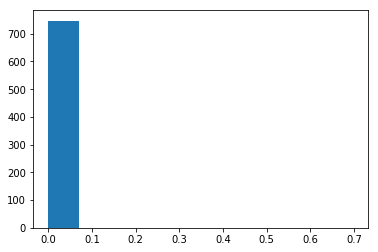

In [13]:
indices1, _ = hist_and_support(pca.weights)

In [14]:
pca1 = dill.load(open(filename, 'rb'))
subweights = pca.weights[indices1]
pca1.controlset = [pca1.controlset[i] for i in indices1]
pca1.probs = list(np.array(subweights.T/sum(subweights)).T)

In [15]:
# Save the weighted controls

import dill
dill.dump(pca0, open('0_' + filename, 'wb'))

import dill
dill.dump(pca1, open('1_' + filename, 'wb'))

# Diamond Norm

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from ipyparallel import Client
rc = Client(profile='mpi3')
dc = rc[:]

/home/anthony/.pyenv/versions/3.6.3/envs/personal/lib/python3.6/site-packages/ipyparallel/client/client.py:459: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@GLaDOS')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


In [18]:
import os
dc.push({'cwd':os.getcwd()})

got unknown result: ddbcb584-3a446e33d724dfec86d4ffbc


<AsyncResult: _push>

In [19]:
%%px
import os
os.chdir(cwd)

In [20]:
%%px
import dill
import itertools
import numpy as np
from pauli_channel_approximation import compute_dpn_and_fid
import matplotlib.pyplot as plt
from itertools import product

In [21]:
%%px 
from mpi4py import MPI
comm = MPI.COMM_WORLD
rank = comm.Get_rank()
print(rank)

[stdout:0] 0
[stdout:1] 1
[stdout:2] 2
[stdout:3] 3
[stdout:4] 4
[stdout:5] 5
[stdout:6] 6
[stdout:7] 7
[stdout:8] 8
[stdout:9] 9
[stdout:10] 10
[stdout:11] 11
[stdout:12] 12
[stdout:13] 13
[stdout:14] 14
[stdout:15] 15
[stdout:16] 16
[stdout:17] 17
[stdout:18] 18
[stdout:19] 19
[stdout:20] 20


In [22]:
%%px
filename = 'pickled_controls5.pkl'
pca0 = dill.load(open('0_' + filename, 'rb')) # 0RBC
pca1 = dill.load(open('1_' + filename, 'rb')) # 1RBC

# Diamond Norm

In [23]:
%%px
import sys
import itertools
from itertools import product
from copy import deepcopy
from functools import reduce

from diamond import diamond_norm, jamiolkowski

def superoperator(unitary):

    return np.kron(unitary.conj(), unitary)

def choi_form(unitary):

    return jamiolkowski(superoperator(unitary))

# misdefining this as accepting unitaries when it takes superoperators seems to have no effect on the diamond norm - strange.
# def diamond_distance(unitary_a,unitary_b):
#     return diamond_norm(choi_form(unitary_a) - choi_form(unitary_b))/2.

def diamond_distance(sopa, sopb):
    rtn = (jamiolkowski(sopa) - jamiolkowski(sopb))/2
    return diamond_norm(rtn)

def compute_diamond_norm(data):
    controlset, ambient_hamiltonian0, combo, dt, control_hamiltonians, target_operator, probs = data
    print("DOING COMBO {}".format(combo))
    sys.stdout.flush()
    fidelities = []
    projs = []
    sops = []
    controlset_unitaries = []
    d_norms = []

    for controls in controlset:
        newcontrols = deepcopy(controls)
        ambient_hamiltonian = [deepcopy(ah).astype("complex") for ah in ambient_hamiltonian0]
        for cnum, value in enumerate(combo):
            cnum -= len(ambient_hamiltonian0)
            if cnum >= 0:
                newcontrols[:, cnum] = newcontrols[:, cnum] * (1 + value)
            if cnum < 0:
                ambient_hamiltonian[cnum] *= float(value)
        print(ambient_hamiltonian, control_hamiltonians)
        step_unitaries = control_unitaries(ambient_hamiltonian,
                                           control_hamiltonians, newcontrols,
                                           dt)
        unitary = reduce(lambda a, b: a.dot(b), step_unitaries)
        sop = error_unitary(unitary, target_operator)
        sops.append(sop)
        d_norms.append(diamond_distance(sop, np.eye(sop.shape[0])))
    avg_sop = reduce(lambda a, b: a + b, [prob * sops[i] for i, prob in enumerate(probs)])
    d_norms.append(diamond_distance(avg_sop, np.eye(avg_sop.shape[0])))
    return d_norms

In [24]:
%%px
num_pts = 21
#pca0 and pca1 should have the same detunings, so we just use pca0 here.
base = np.logspace(-4.7, np.log(pca0.detunings[0][0])/np.log(10), (num_pts - 1)/2)
controls = np.concatenate([np.sort(-base),np.array([0]), base])
combinations0 = [[det,0, 0] for det in controls]

controls = np.concatenate([np.sort(-base),np.array([0]), base])
combinations1 = [[0,det, det] for det in controls]

In [25]:
%%px 
controls

Out[0:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[1:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[2:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[3:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[4:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[5:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[6:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[7:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[8:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[9:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[10:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[11:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[12:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[13:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[14:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[15:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[16:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[17:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[18:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[19:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

Out[20:550]: 
array([-1.00000000e-03, -6.47308204e-04, -4.19007911e-04, -2.71227258e-04,
       -1.75567629e-04, -1.13646367e-04, -7.35642254e-05, -4.76187266e-05,
       -3.08239924e-05, -1.99526231e-05,  0.00000000e+00,  1.99526231e-05,
        3.08239924e-05,  4.76187266e-05,  7.35642254e-05,  1.13646367e-04,
        1.75567629e-04,  2.71227258e-04,  4.19007911e-04,  6.47308204e-04,
        1.00000000e-03])

In [26]:
%%px
from pauli_channel_approximation import control_unitaries, error_unitary
def dnorms(pca):
    try:
        combo = combinations0[rank]
        #was pca0, probably the bug
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms0 = compute_diamond_norm(lst)

        combo = combinations1[rank]
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms1 = compute_diamond_norm(lst)
    except IndexError:
        pass
    return d_norms0, d_norms1

# 0RBC

In [27]:
%%px
combo = combinations0[rank]
d_norms00, d_norms01 = dnorms(pca0)

[stdout:0] 
DOING COMBO [-0.001000000000000001, 0, 0]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

# 1RBC

In [28]:
%%px
d_norms10, d_norms11 = dnorms(pca1)

[stdout:0] 
DOING COMBO [-0.001000000000000001, 0, 0]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.001+0.j, -0.   +0.j],
       [-0.   +0.j,  0.001-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

In [29]:
num_pts = 21

In [30]:
diamond_norms00 = np.array([rc[i]['d_norms00'] for i in range(num_pts)])
diamond_norms01 = np.array([rc[i]['d_norms01'] for i in range(num_pts)])

In [31]:
diamond_norms10 = np.array([rc[i]['d_norms10'] for i in range(num_pts)])
diamond_norms11 = np.array([rc[i]['d_norms11'] for i in range(num_pts)])

In [32]:
controls = np.array([rc[i]['combo'][0] for i in range(num_pts)])

# If we don't include enough controls (say 20) the two plots will look similar. Need more controls for more diversity in the solutions.

In [33]:
fontsize=20

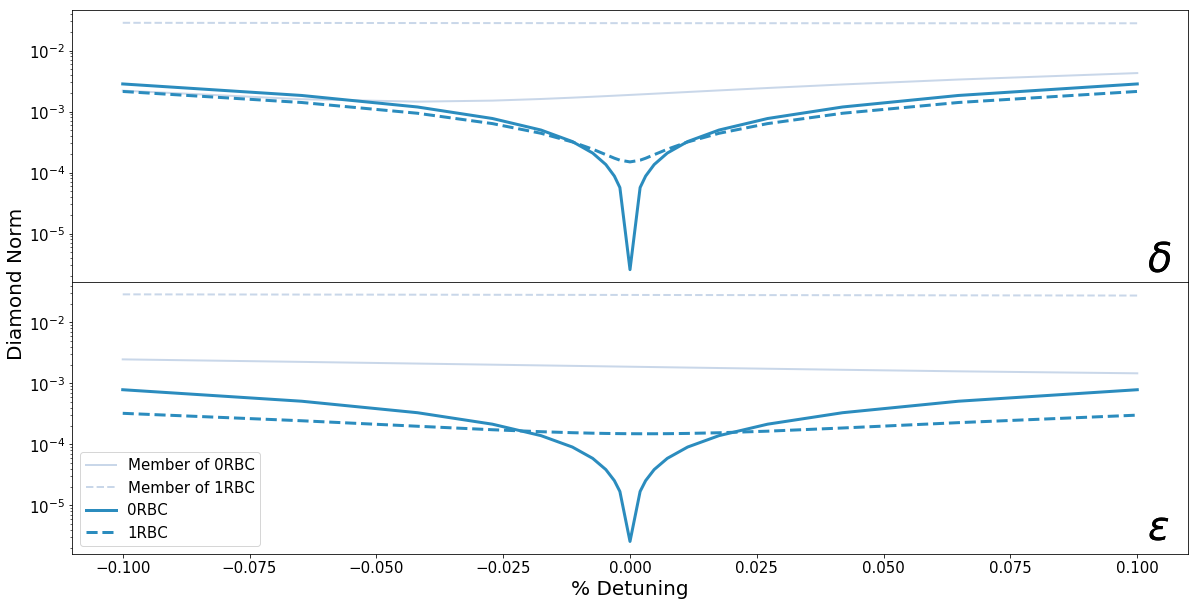

In [39]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True, figsize=(20, 10))
for i, (a, b) in enumerate(((diamond_norms00, diamond_norms10), (diamond_norms01, diamond_norms11))):
    ax = [ax1, ax2][i]
    #plt.figure(figsize=(10,6))

    ax.semilogy(controls*100, np.array(a).T[7], linewidth = 2, alpha=.6, color='#a6bddb', label="Member of 0RBC", ls="-");
    ax.semilogy(controls*100, np.array(b).T[7], linewidth = 2, alpha=.6, color='#a6bddb', label="Member of 1RBC", ls="--");
    ax.semilogy(controls*100, np.array(a).T[-1], linewidth = 3, alpha=1, color='#2b8cbe', label="0RBC", ls="-");
    ax.semilogy(controls*100,np.array(b).T[-1], linewidth = 3, alpha=1, color='#2b8cbe', label="1RBC", ls="--");
    ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize*3/4)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fontsize*3/4)
    plt.text(.102, .07, r'$\delta$', fontsize=fontsize*2)
    plt.text(.102, .0000028, r'$\epsilon$', fontsize=fontsize*2)
plt.subplots_adjust(wspace=0, hspace=0)
f.text(.08, 0.5, "Diamond Norm", va='center', rotation='vertical', fontsize=fontsize)
plt.xlabel("% Detuning", fontsize=fontsize)
plt.legend(prop={'size': 15}, loc=3)